# Regularization Techniques Demonstration

This notebook demonstrates how to use regularization techniques to improve the performance of a regression model.

## Import Required Libraries

Import the necessary libraries including matplotlib, numpy, pandas, and scikit-learn.

In [1]:
# Import the required libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import root_mean_squared_error, r2_score

## Load and Prepare Dataset

Load the Breast Cancer Wisconsin dataset and select the most correlated features.

In [2]:
# pylint: disable=E1101
# Load the dataset.
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target
df = df[:100]
# pylint: enable=E1101

# Compute the correlation matrix.
corr_matrix = df.corr()

# Find the two most correlated variables.
corr_target = corr_matrix["target"].drop("target")
most_correlated = corr_target.abs().sort_values(ascending=False).index[:2]

# Extract the most correlated features.
X = df[most_correlated[0]].values.reshape(-1, 1)
y = df[most_correlated[1]].values

## Initialize and Train Models

Initialize polynomial regression, Ridge, and Lasso models with polynomial features.

In [3]:
# Initialize models: Linear Regression, Ridge, and Lasso.
lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=0.1)
lasso_reg = Lasso(alpha=0.1)

# Create polynomial features.
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X)

# Train the models.
lin_reg.fit(X_poly, y)
ridge_reg.fit(X_poly, y)
lasso_reg.fit(X_poly, y)

# Predict the values.
y_pred_lin = lin_reg.predict(X_poly)
y_pred_ridge = ridge_reg.predict(X_poly)
y_pred_lasso = lasso_reg.predict(X_poly)

## Evaluate Model Performance

Calculate and display RMSE and R² scores for all three models.

In [4]:
# Print the mean squared error.
print(f"Polynomial Regression RMSE: {root_mean_squared_error(y, y_pred_lin)}.")
print(f"Ridge Regression RMSE: {root_mean_squared_error(y, y_pred_ridge)}.")
print(f"Lasso Regression RMSE: {root_mean_squared_error(y, y_pred_lasso)}.")

# Print the R^2 score.
print(f"\nPolynomial Regression R^2: {r2_score(y, y_pred_lin)}.")
print(f"Ridge Regression R^2: {r2_score(y, y_pred_ridge)}.")
print(f"Lasso Regression R^2: {r2_score(y, y_pred_lasso)}.")

Polynomial Regression RMSE: 19.860995983541226.
Ridge Regression RMSE: 21.77587917694309.
Lasso Regression RMSE: 21.37062342233728.

Polynomial Regression R^2: 0.6491973059158354.
Ridge Regression R^2: 0.5782915830979232.
Lasso Regression R^2: 0.5938417717244707.


## Visualize Regression Results

Compare the three regression methods visually with the original data points.

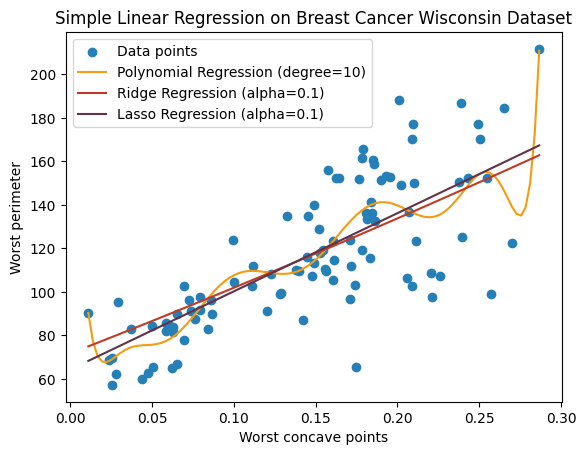

In [5]:
# Plot the training and test data.
plt.scatter(X, y, color="#2580B7", label="Data points")

# Plot the regression lines.
X_test = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_poly_test = poly.fit_transform(X_test)

y_test = lin_reg.predict(X_poly_test)
plt.plot(X_test, y_test, color="#F59B11",
         label="Polynomial Regression (degree=10)")

y_test = ridge_reg.predict(X_poly_test)
plt.plot(X_test, y_test, color="#C03B26",
         label="Ridge Regression (alpha=0.1)")

y_test = lasso_reg.predict(X_poly_test)
plt.plot(X_test, y_test, color="#633248",
         label="Lasso Regression (alpha=0.1)")

# Add labels and legend.
plt.xlabel(most_correlated[0].capitalize())
plt.ylabel(most_correlated[1].capitalize())
plt.legend()
plt.title("Simple Linear Regression on Breast Cancer Wisconsin Dataset")

# Show the plot.
plt.show()